<a href="https://colab.research.google.com/github/Mani-mation/AI-ML-Hostel-Mess-Food-Analysis/blob/main/AIML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### AI/ML Project- Hostel Mess Analysis

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:

from google.colab import files
files.upload()

df = pd.read_csv("mess_feedback_10000_with_dates.csv")

print("First 5 rows of the dataset:")
display(df.head())

Saving mess_feedback_10000_with_dates.csv to mess_feedback_10000_with_dates (5).csv
First 5 rows of the dataset:


,Student_ID,Date,Food_Quality,Cleanliness,Staff_Behavior,Timeliness,Overall_Rating
0,1,2023-01-01 00:00:00,4.0,2.0,4.0,2.0,3.0
1,2,2023-01-01 01:00:00,3.0,2.0,4.0,3.0,3.0
2,3,2023-01-01 02:00:00,4.0,2.0,3.0,4.0,3.0
3,4,2023-01-01 03:00:00,4.0,3.0,4.0,4.0,NaN
4,5,2023-01-01 04:00:00,3.0,3.0,3.0,5.0,3.0


In [ ]:

print("\nMissing values before cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
Student_ID          0
Date                0
Food_Quality      300
Cleanliness       100
Staff_Behavior    400
Timeliness        200
Overall_Rating    500
dtype: int64


In [ ]:

df = df.drop_duplicates()

df.fillna(df.mean(numeric_only=True), inplace=True)

rating_columns = [
    "Food_Quality", "Cleanliness",
    "Staff_Behavior", "Timeliness",
    "Overall_Rating"
]

df[rating_columns] = df[rating_columns].clip(1, 5).astype(int)

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
Student_ID        0
Date              0
Food_Quality      0
Cleanliness       0
Staff_Behavior    0
Timeliness        0
Overall_Rating    0
dtype: int64


In [ ]:
stats_report = df[rating_columns].describe()
print("\nStatistical Summary:")
display(stats_report)


Statistical Summary:


,Food_Quality,Cleanliness,Staff_Behavior,Timeliness,Overall_Rating
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.192000,2.509700,3.85180,4.081900,3.350600
std,0.831868,0.750041,0.66429,0.872163,0.519525
min,1.000000,1.000000,2.00000,1.000000,2.000000
25%,3.000000,2.000000,3.00000,4.000000,3.000000
50%,3.000000,3.000000,4.00000,4.000000,3.000000
75%,4.000000,3.000000,4.00000,5.000000,4.000000
max,5.000000,5.000000,5.00000,5.000000,5.000000


In [ ]:
average_scores = df[rating_columns].mean()
print("\nAverage Satisfaction Scores:")
display(average_scores)


Average Satisfaction Scores:


,0
Food_Quality,3.1920
Cleanliness,2.5097
Staff_Behavior,3.8518
Timeliness,4.0819
Overall_Rating,3.3506


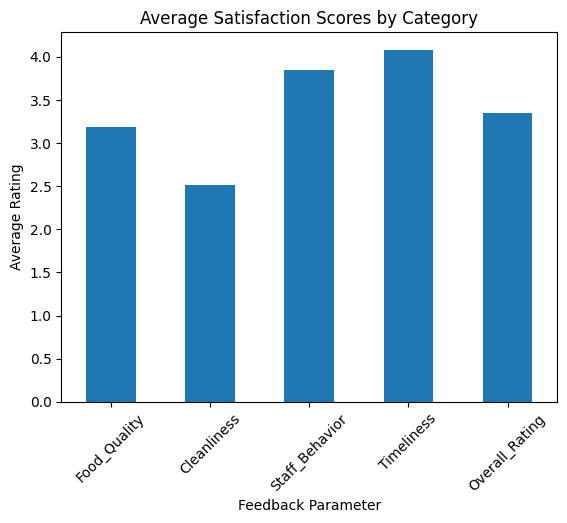

In [ ]:
plt.figure()
average_scores.plot(kind="bar")
plt.title("Average Satisfaction Scores by Category")
plt.xlabel("Feedback Parameter")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-940942412.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.resample("M", on="Date")["Overall_Rating"].mean()


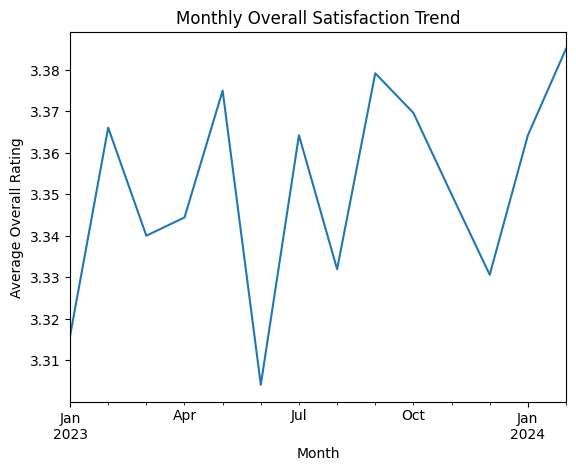

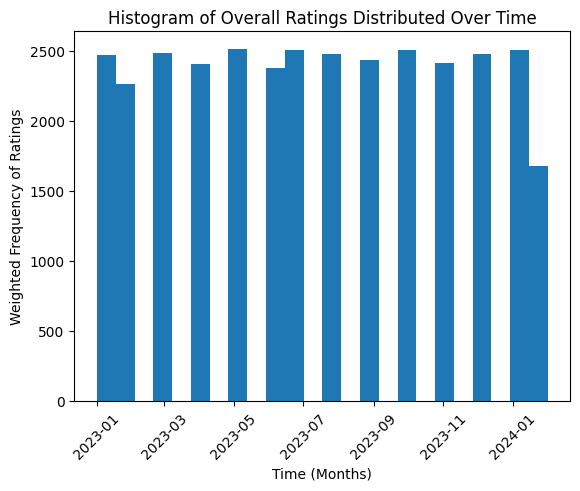

In [ ]:

df["Date"] = pd.to_datetime(df["Date"])

monthly_trend = df.resample("M", on="Date")["Overall_Rating"].mean()

plt.figure()
monthly_trend.plot(kind="line")
plt.title("Monthly Overall Satisfaction Trend")
plt.xlabel("Month")
plt.ylabel("Average Overall Rating")
plt.show()


df["Month"] = df["Date"].dt.to_period("M").dt.to_timestamp()

plt.figure()
plt.hist(
    df["Month"],
    bins=24,
    weights=df["Overall_Rating"],
)

plt.title("Histogram of Overall Ratings Distributed Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("Weighted Frequency of Ratings")
plt.xticks(rotation=45)
plt.show()


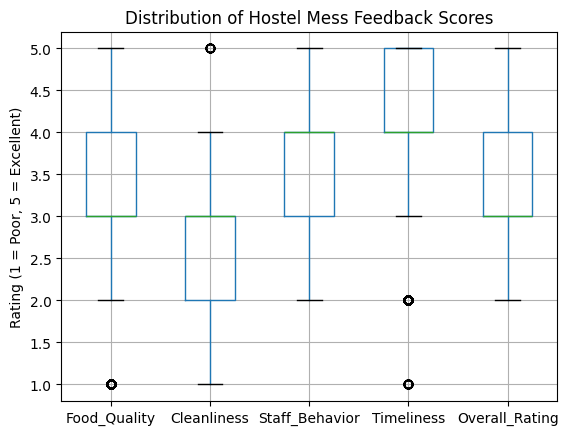

In [ ]:

plt.figure()
df[rating_columns].boxplot()
plt.title("Distribution of Hostel Mess Feedback Scores")
plt.ylabel("Rating (1 = Poor, 5 = Excellent)")
plt.show()
